# Frequent Value Imputation

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('train2.csv' , usecols = ['GarageQual' , 'FireplaceQu' , 'SalePrice'])

In [7]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [9]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

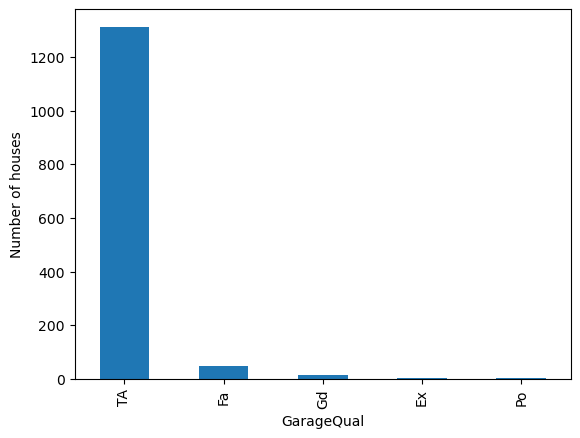

In [23]:
# df['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
df['GarageQual'].value_counts().sort_values(ascending = False).plot(kind ='bar')
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [25]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

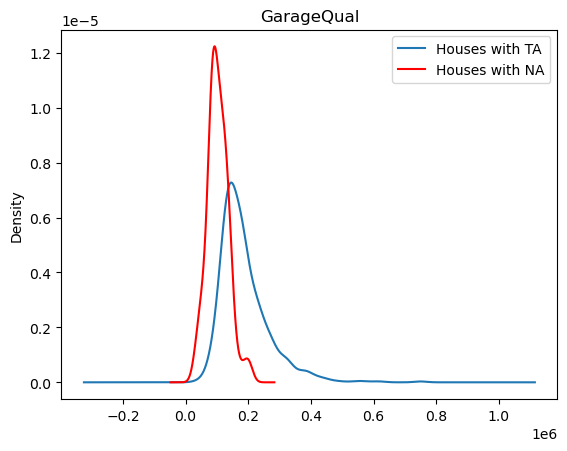

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind ='kde' , ax = ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind ='kde' , ax = ax, color='red')

lines,labels = ax.get_legend_handles_labels()

labels = ['Houses with TA' , 'Houses with NA']
ax.legend(lines,labels, loc = 'best')

plt.title('GarageQual')

In [35]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [41]:
# Jitni bhi Missing values hai unhe ham 'TA' se replace kar rhe hai ----------->

df['GarageQual'].fillna('TA',inplace = True)

<Axes: xlabel='GarageQual'>

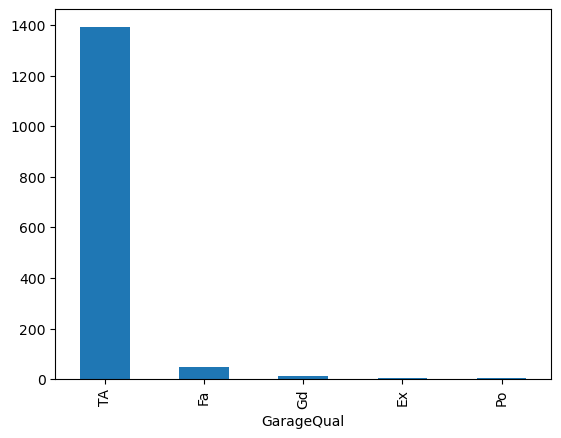

In [43]:
df['GarageQual'].value_counts().plot(kind ='bar')

Text(0.5, 1.0, 'GarageQual')

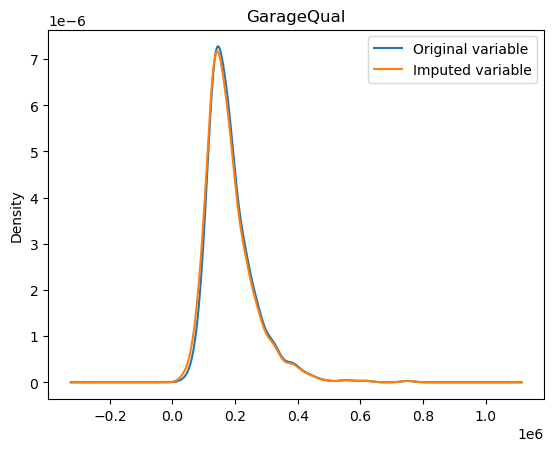

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind ='kde',ax=ax)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind ='kde' , ax = ax)

lines,labels = ax.get_legend_handles_labels()

labels = ['Original variable' , 'Imputed variable']
ax.legend(lines,labels, loc = 'best')

# add title ------------------------->
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

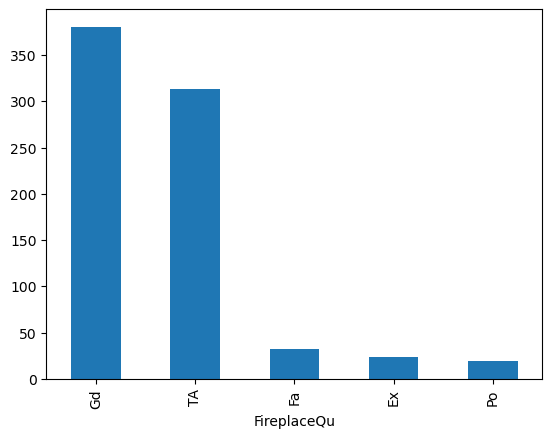

In [47]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

In [49]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

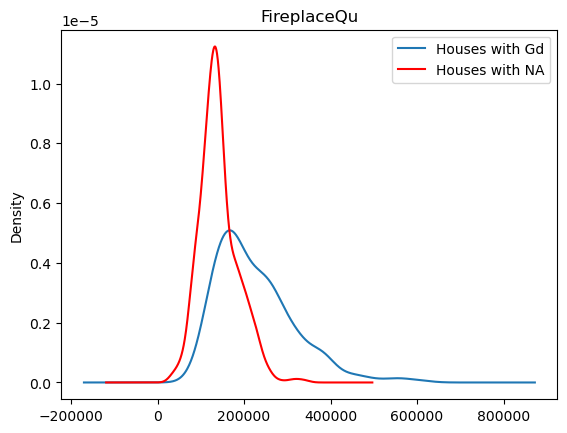

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind ='kde' , ax = ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind ='kde' , ax = ax, color='red')

lines,labels = ax.get_legend_handles_labels()

labels = ['Houses with Gd' , 'Houses with NA']
ax.legend(lines,labels, loc = 'best')

plt.title('FireplaceQu')

In [53]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [57]:
# Jitni bhi Missing values hai unhe ham 'Gd' se replace kar rhe hai ----------->

df['FireplaceQu'].fillna('Gd',inplace = True)

<Axes: xlabel='FireplaceQu'>

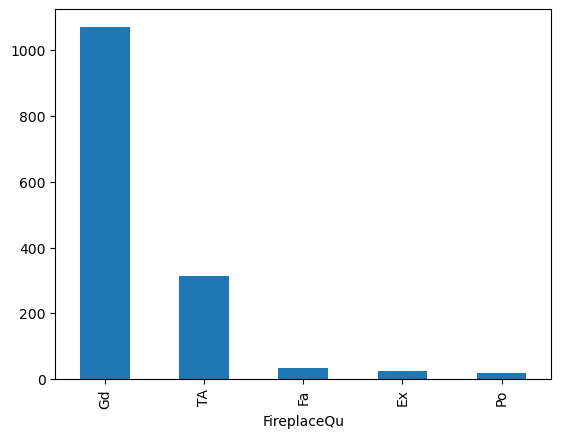

In [61]:
df['FireplaceQu'].value_counts().plot(kind ='bar')

Text(0.5, 1.0, 'FireplaceQu')

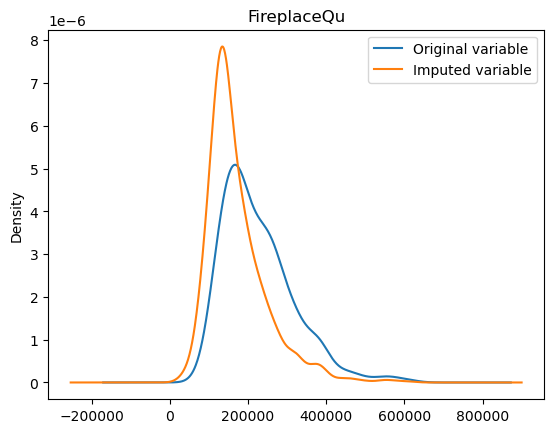

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde' , ax = ax)

# Distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind ='kde' , ax = ax)

lines,labels = ax.get_legend_handles_labels()

labels = ['Original variable' , 'Imputed variable']
ax.legend(lines,labels, loc = 'best')

plt.title('FireplaceQu')

# Using Sklearn ------------------------------>

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(df.drop(columns =['SalePrice']), df['SalePrice'], test_size = 0.2)

In [73]:
X_train.head()

,FireplaceQu,GarageQual
458,Gd,TA
835,Gd,TA
233,Gd,TA
657,Gd,TA
302,TA,TA


In [77]:
from sklearn.impute import SimpleImputer

In [79]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [85]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [89]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)